Denoise data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

plt.rcParams['figure.dpi'] = 150

In [2]:
# Load raw data
T = np.genfromtxt('2H2_orig.csv', delimiter=',', skip_header=21)
deltaIn = .301

In [3]:
l1, l2 = T.shape

# Extract the X-coordinate
X = T[:,0]


T_new = np.full_like(T, np.nan)

# lst = [1750, 2000, 2000, 2500, 2700, 3200, 3700, 3600, 3200, 2500, 2000, 1800]
lst = [1500, 1750, 2000, 2000, 2500, 2700, 3200, 3700, 3550, 3200, 2500, 1700, 1500, 1300]
iLst = [0, 100, 200, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 7500, 7732]
j = 1
it = 0
# lim = lst[j]
limSpace = np.linspace(lst[j-1], lst[j], iLst[j] - iLst[j-1] + 1)
for ind in range(l2):
    lim = int(limSpace[it])
    T_new[10:lim, ind] = T[10:lim, ind]
    it += 1

    if ind == iLst[j]:
        # print(j)
        j += 1
        limSpace = np.linspace(lst[j-1], lst[j], iLst[j] - iLst[j-1] + 1)
        it = 0
        if j == 13:
            j = 12

In [5]:
X[1] - X[0]

0.30134894219417396

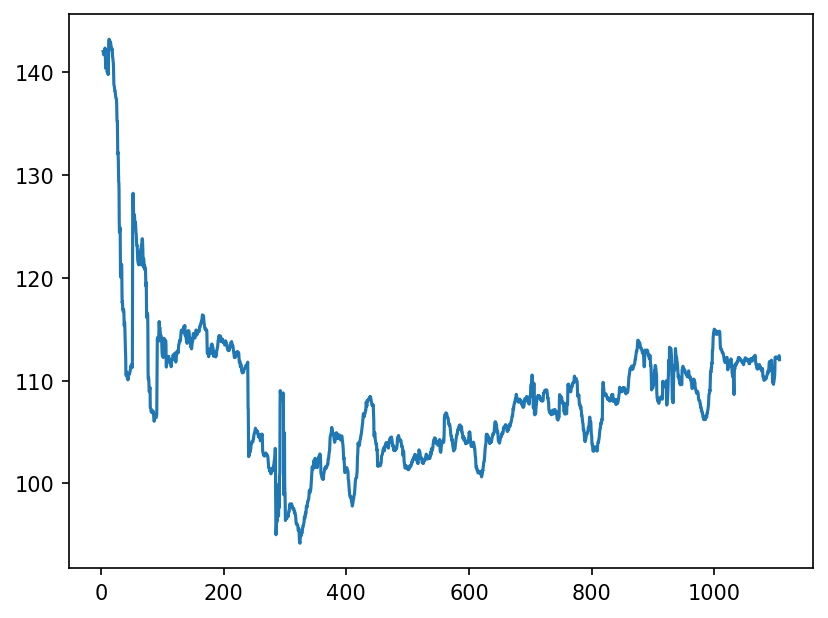

In [7]:
plt.plot(X, T_new[:, 4200])
plt.show()

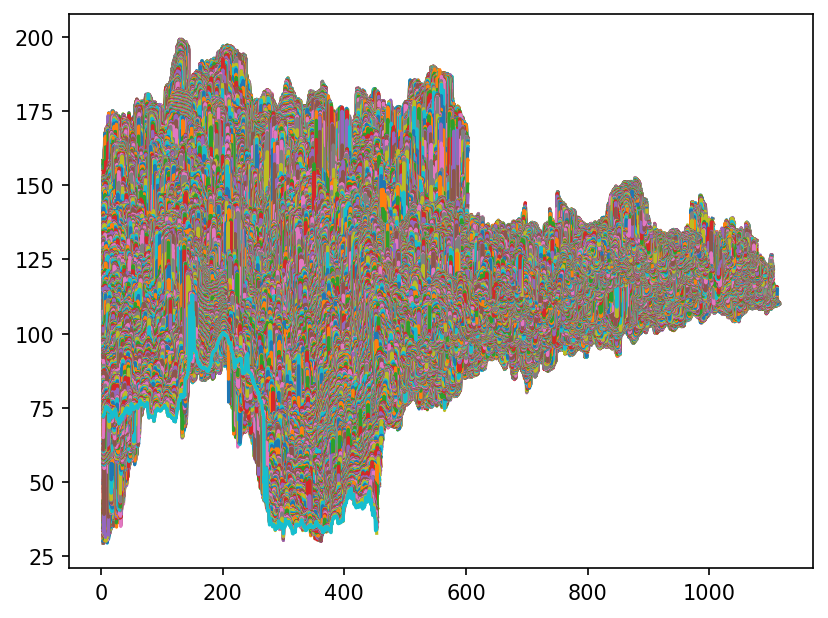

In [7]:
plt.plot(X, T_new[:,1:])
plt.show()

In [9]:
T = T_new[:, 1:]
T.shape

(3887, 7731)

In [10]:
T = np.flip(T, 0)
T.shape

(3887, 7731)

In [12]:
np.savetxt('denoisedData.csv', T, delimiter=',')

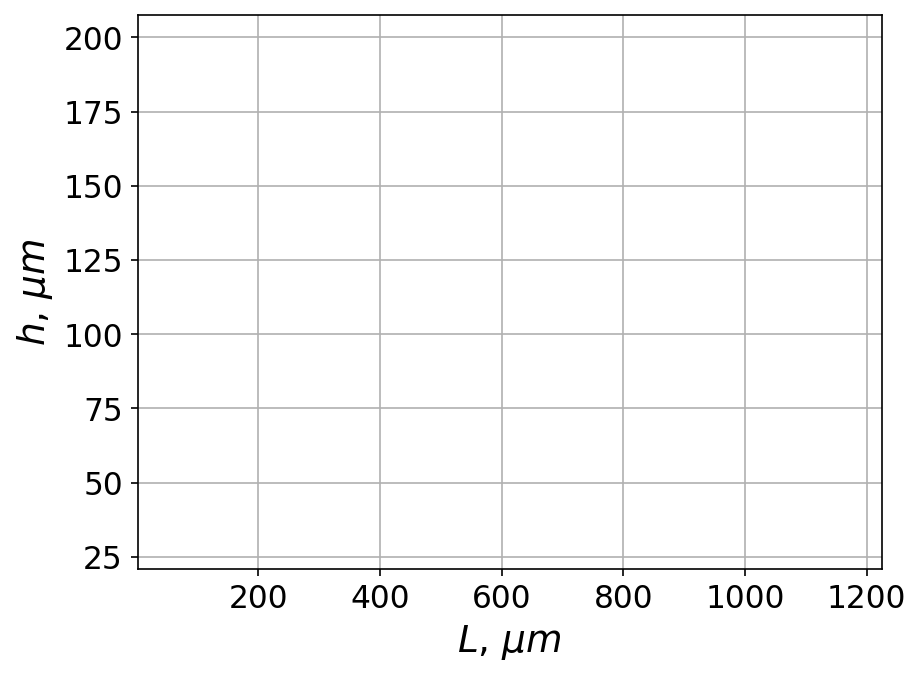

In [23]:
plt.plot(X, T, color="C0", alpha=0.0015)
plt.ylabel(r'$h$, $\mu m$', fontsize="18")
plt.xlabel(r'$L$, $\mu m$', fontsize="18")
plt.tick_params(axis='both', labelsize=15)
plt.grid()
# plt.savefig("./images/S2H2_Detrended_P_40_60.png", format="png", bbox_inches="tight", dpi=300)
plt.show()

5.995 sec. elapsed


ValueError: autodetected range of [nan, nan] is not finite

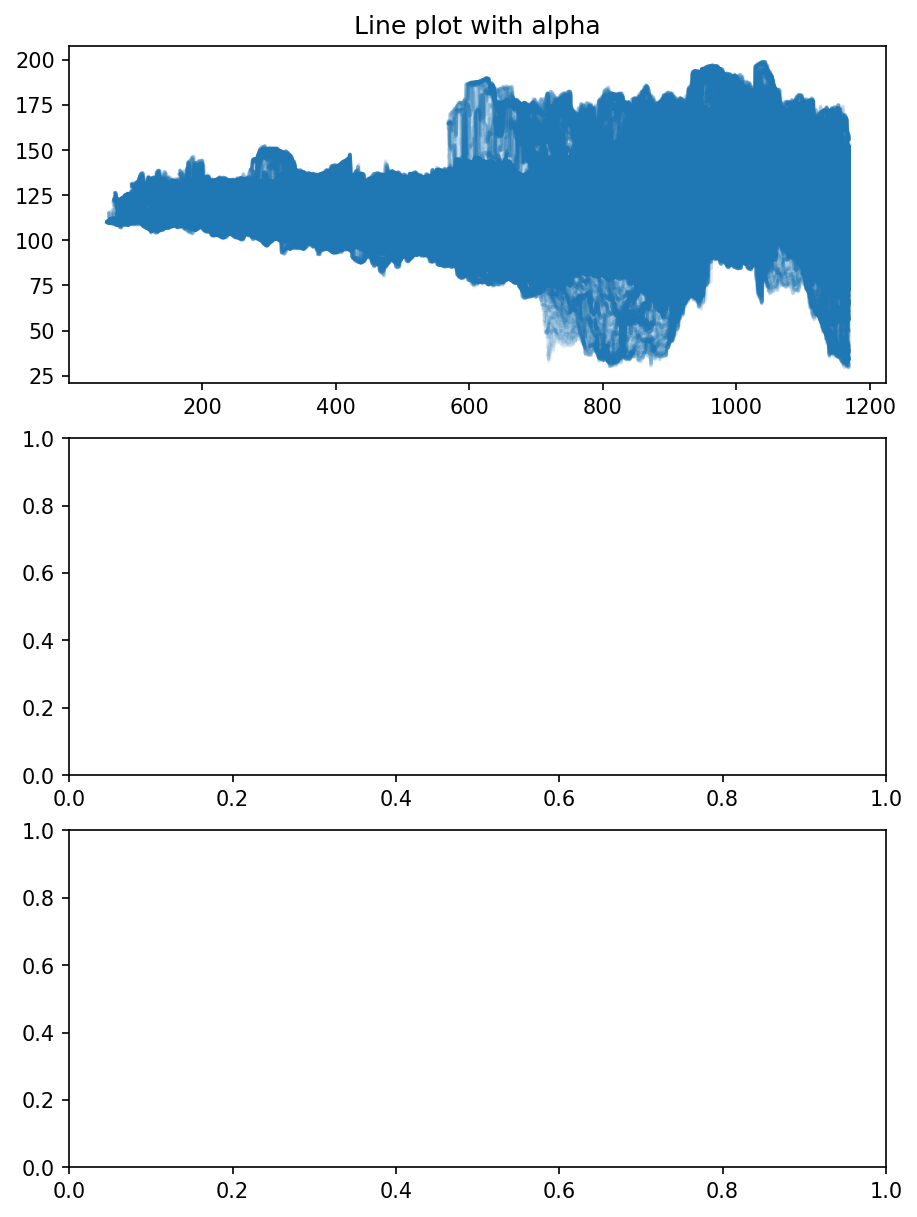

In [18]:
fig, axes = plt.subplots(nrows=3, figsize=(6, 8), layout='constrained')

x = X
Y = T.T

num_series = T.shape[1]
num_points = T.shape[0]

# Plot series using `plot` and a small value of `alpha`. With this view it is
# very difficult to observe the sinusoidal behavior because of how many
# overlapping series there are. It also takes a bit of time to run because so
# many individual artists need to be generated.
tic = time.time()
axes[0].plot(x, Y.T, color="C0", alpha=0.1)
toc = time.time()
axes[0].set_title("Line plot with alpha")
print(f"{toc-tic:.3f} sec. elapsed")


# Now we will convert the multiple time series into a histogram. Not only will
# the hidden signal be more visible, but it is also a much quicker procedure.
tic = time.time()
# Linearly interpolate between the points in each time series
    
num_fine = 800
x_fine = np.linspace(np.nanmin(x), np.nanmax(x), num_fine)
y_fine = np.concatenate([np.interp(x_fine, x, y_row) for y_row in Y])
x_fine = np.broadcast_to(x_fine, (num_series, num_fine)).ravel()



# Plot (x, y) points in 2d histogram with log colorscale
# It is pretty evident that there is some kind of structure under the noise
# You can tune vmax to make signal more visible
cmap = plt.colormaps["plasma"]
cmap = cmap.with_extremes(bad=cmap(0))
h, xedges, yedges = np.histogram2d(x_fine, y_fine, bins=[400, 100])

pcm = axes[1].pcolormesh(xedges, yedges, h.T, cmap=cmap,
                         norm="log", vmax=.25e2, rasterized=True)
fig.colorbar(pcm, ax=axes[1], label="# points", pad=0)
axes[1].set_title("2d histogram and log color scale")

# Same data but on linear color scale
pcm = axes[2].pcolormesh(xedges, yedges, h.T, cmap=cmap,
                         vmax=10, rasterized=True)
fig.colorbar(pcm, ax=axes[2], label="# points", pad=0)
axes[2].set_title("2d histogram and linear color scale")

toc = time.time()
print(f"{toc-tic:.3f} sec. elapsed")
# plt.savefig("./images/S2H2_Detrended_P_40_60_distrib.png", format="png", bbox_inches="tight", dpi=300)
plt.show()